In [10]:
import numpy as np
import warnings
import os
import cv2
import matplotlib.pyplot as plt
from insightface.app import FaceAnalysis

In [11]:
os.getcwd()

'/Users/oscaramirmansour/AwakeDrowsyObjDetec'

In [12]:
# Suppress the FutureWarning from insightface.utils.transform
warnings.filterwarnings("ignore", category=FutureWarning)

In [13]:
app = FaceAnalysis(name='buffalo_l')
app.prepare(ctx_id=0, det_size=(640,640))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/onnxruntime/capi/onnxruntime_inference_collection.py:69: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/oscaramirmansour/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/oscaramirmansour/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/oscaramirmansour/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/oscaramirmansour/.insightface/models/buffalo_l/genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/oscaramirmansour/.insightface/models/buffalo_l/w600k_r5

In [18]:
img = cv2.imread('data/images/awake.82ce01a2-8a54-11ee-b275-784f434cfd22.jpg')

In [19]:
faces = app.get(img)

In [20]:
len(faces)

1

In [23]:
bbox = faces[0]['bbox']

In [24]:
bbox

array([558.7569 , 241.75958, 821.13885, 618.30994], dtype=float32)

In [25]:
bbox = bbox.astype(int)

In [26]:
img_face = img[bbox[1]:bbox[3], bbox[0]:bbox[2], :]

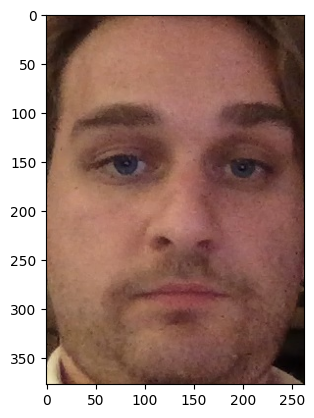

In [27]:
plt.imshow(cv2.cvtColor(img_face, cv2.COLOR_BGR2RGB))